Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Enter the path to the new fundus image: /Diabetic_Image/186_left.jpg
1/1 [==============================] - 0s 273ms/step


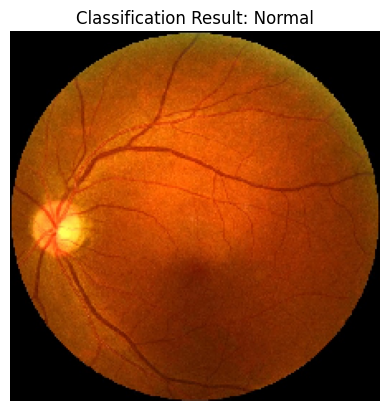

In [3]:
from google.colab import drive
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define the image size for model input
IMAGE_SIZE = (224, 224)

# Mount Google Drive
drive.mount('/content/gdrive')

# Load the pre-trained model
model_path = '/content/gdrive/My Drive/diabetic_binary_model.h5'
model = load_model(model_path)

# Function to classify a new fundus image
def classify_fundus_image(image_path, model, threshold=0.5):
    # Load and preprocess the new fundus image
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to the range [0, 1]

    # Make predictions
    prediction = model.predict(img_array)

    # Interpret the prediction
    if prediction < threshold:
        return "Normal", img
    else:
        return "Abnormal", img

# User input: Provide the path to the new fundus image
new_image_path = input("Enter the path to the new fundus image: ")

# Ensure the path starts with "/content/gdrive/My Drive/"
if not new_image_path.startswith("/content/gdrive/My Drive/"):
    new_image_path = "/content/gdrive/My Drive/" + new_image_path

# Classify the new fundus image and get the result along with the image
result, input_image = classify_fundus_image(new_image_path, model)

# Display the input image along with the classification result
plt.imshow(input_image)  # Display the input image
plt.title(f"Classification Result: {result}")  # Display the classification result as the title
plt.axis('off')  # Turn off axis
plt.show()
